Convolutional neural networks leverage spatial information and are very well suited for classifying images. Theses nets use an ad hoc architecture inspired by biological data taken from physiological experiments done on the visual cortex.

A DCNN (deep convolutional neural network) has two different types of layers, convolutional and pooling. There are three key intuition beyond ConvNets:

- Local receptive fields. A single hidden neuron represents one local receptive field, a submatrix of adjacent input neurons is connected to this hidden neuron. This connection is convolution. These submatrices can be overlapped and the length between them is _stride length_.

- Shared weights. Convolutional operation uses the same kernel matrix for all neurons of the same layer.

- Pooling. To summarize the output of a feature map, we use the spatial contiguity of the output produced from a single feature map and aggregate the values of a submatrix into a single output. We can use max-pooling or average pooling.


# LeNet

The key intuition  is to have low-layers alternating convolution operations with max-pooling opeartions. Then higher levels are fully connected layers based on a traditional MLP with hidden layers and softmax as the output layer.

In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # Conv => ReLU => Pooling
        model.add(Conv2D(20, kernel_size=5, padding='same', 
                         input_shape=input_shape, activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(50, kernel_size=5, padding='same',activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => ReLU
        model.add(Flatten())
        model.add(Dense(500, activation='relu'))
        # a softmax classifier
        model.add(Dense(classes, activation='softmax'))
        
        return model
        

In [0]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2

IMG_ROWS, IMG_COLS = 28, 28
NB_CLASSES = 10
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering('th')

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
X_train = X_train[:, np.newaxis, :, :] # 60000 * 1(channel) * 28 * 28
X_test = X_test[:, np.newaxis, :, :]

In [0]:
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [8]:
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER,
             metrics=['accuracy'])

W0812 13:07:41.036310 139848496334720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 13:07:41.040844 139848496334720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 13:07:41.045581 139848496334720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 13:07:41.079597 139848496334720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0812 13:07:41.082701 1398484963

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 28, 28)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 14, 14)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 7, 7)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total para

In [10]:
history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

W0812 13:07:44.443542 139848496334720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 9s 192us/step - loss: 0.1891 - acc: 0.9432 - val_loss: 0.0622 - val_acc: 0.9806
Epoch 2/20
48000/48000 [==============================] - 6s 124us/step - loss: 0.0504 - acc: 0.9839 - val_loss: 0.0425 - val_acc: 0.9876
Epoch 3/20
48000/48000 [==============================] - 6s 126us/step - loss: 0.0342 - acc: 0.9890 - val_loss: 0.0427 - val_acc: 0.9861
Epoch 4/20
48000/48000 [==============================] - 6s 124us/step - loss: 0.0236 - acc: 0.9924 - val_loss: 0.0353 - val_acc: 0.9892
Epoch 5/20
48000/48000 [==============================] - 6s 122us/step - loss: 0.0177 - acc: 0.9939 - val_loss: 0.0396 - val_acc: 0.9883
Epoch 6/20
48000/48000 [==============================] - 6s 122us/step - loss: 0.0142 - acc: 0.9954 - val_loss: 0.0363 - val_acc: 0.9899
Epoch 7/20
48000/48000 [==============================] - 6s 122us/step - loss: 0.0108 - acc: 0.9964 - val_loss: 0.0299 - 

In [11]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 93us/step

Test score: 0.03878004357766008
Test accuracy: 0.9913


In [12]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


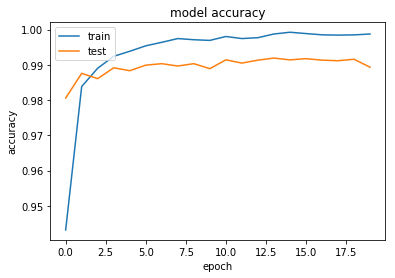

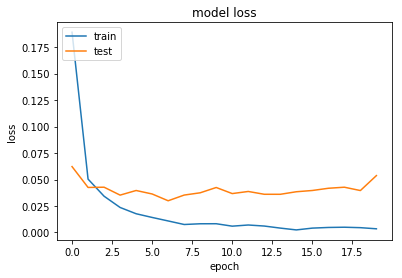

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from google.colab import drive

In [17]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model.save('gdrive/My Drive/LeNet.h5')